# Unsuperving Learning

I have come this far (I should be proud of myself), diving into the cake, and this is going to come handly for the Data Science Bowl 2019. `(Semi-Supervised Learning)`

# Setup

_Import the common modules, ensure Matplotlib plots are inline,
perhaps writing a function to save the figures. Check if the 
modules are of the required version._

In [2]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

# Common modules
import numpy as np
import os

# Make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Save the figures created
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def SaveGraph(fig_id, tight_layout=True, extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=extension, dpi=resolution)
    
# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Clustering

## Introduction - Classification vs Clustering

In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
type(X)

numpy.ndarray

In [6]:
X[y==0, 2]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [7]:
X[:,2]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

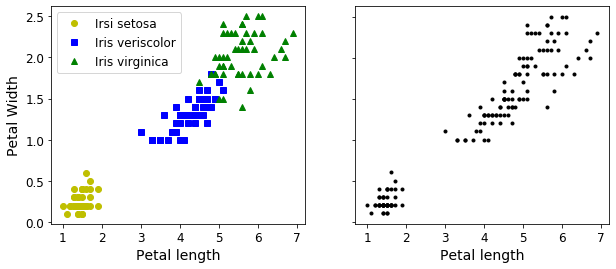

In [8]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Irsi setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris veriscolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

_A Gaussian mixture model apparently can seperate the clusters quite easily and well with all the four features._

In [9]:
from sklearn.mixture import GaussianMixture

In [10]:
GM = GaussianMixture(n_components=3, random_state=42)
GM.fit(X)
y_pred = GM.predict(X)

In [11]:
y_pred.shape

(150,)

In [12]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

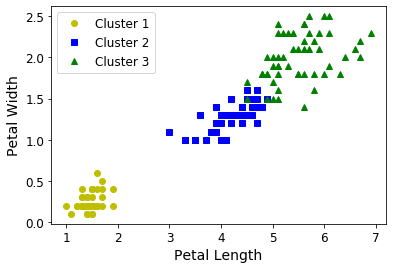

In [15]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [16]:
np.sum(y_pred==y)

145

In [17]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

# K-Means

Let's start by generating some blobs.

In [18]:
from sklearn.datasets import make_blobs

In [19]:
blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [20]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                 cluster_std=blob_std, random_state=7)

In [21]:
X.shape

(2000, 2)

In [22]:
y

array([4, 2, 0, ..., 3, 0, 2])

In [23]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


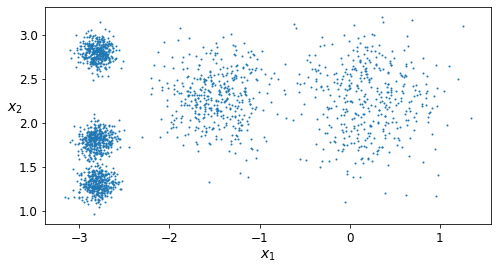

In [24]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

## Fit and predict

In [25]:
from sklearn.cluster import KMeans

In [26]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [27]:
type(y_pred)

numpy.ndarray

In [28]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [29]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [30]:
X_new = np.array([[0,2], [3,2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

## Decision Boundaries

In [31]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=30, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=50, linewidths=50,
               color=cross_color, zorder=11, alpha=1)
    

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [32]:
X.min(axis=1)

array([-2.69823941, -2.87459835,  0.96077126, ..., -2.80303543,
        0.24057359, -2.63807768])

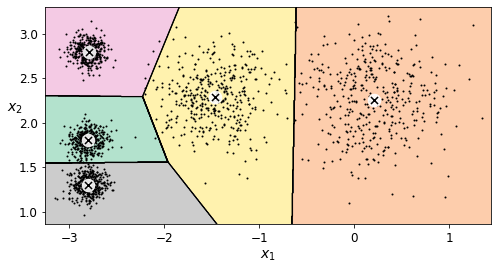

In [33]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [35]:
kmeans.inertia_

211.5985372581684

In [36]:
kmeans.score(X)

-211.59853725816856

## Accelerated K-Means

In [77]:
%timeit -n 50 KMeans(algorithm='elkan').fit(X)

106 ms ± 5.85 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [36]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

124 ms ± 6.2 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Mini-Batch K-Means

In [34]:

from sklearn.cluster import MiniBatchKMeans

In [35]:
mini_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
mini_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [36]:
mini_kmeans.inertia_

211.93186531476775

In [37]:
import urllib
from sklearn.datasets import fetch_openml

mnist =  fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state=42)

Next, we write the `memmap`:

In [39]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [40]:
mini_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
mini_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [41]:
type(X_mm)

numpy.memmap

In [42]:
xx = np.array([1, 2, 3, 4, 5])

In [43]:
xx[:]

array([1, 2, 3, 4, 5])

In [44]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), 
                              batch_size, replace=False)]

In [45]:
np.random.choice(len(X), 40, replace=False)

array([1860,  353, 1333,  905, 1289, 1273,  938, 1731,   65, 1323,   56,
       1292, 1118,  584,  374,  275,  746,  128, 1646, 1852,  674, 1664,
       1981, 1083, 1922,   99, 1179,  964,  792,   29,  628,  944,  572,
        907, 1080,  450, 1609, 1290, 1078,  254])

In [46]:
np.random.seed(42)

In [47]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)
    
    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_
    
    if (best_kmeans is None or 
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans
        

In [48]:
best_kmeans.score(X)

-211.70999744411483

In [92]:
%timeit  KMeans(n_clusters=5).fit(X)

54.1 ms ± 8.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [93]:
from timeit import timeit

In [54]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1] = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

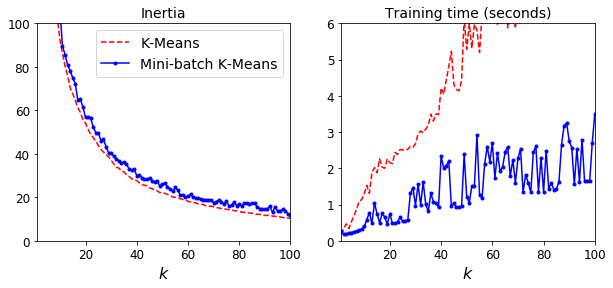

In [61]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

## Finding the optimal number of clusters.

In [49]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
        clusterer1.fit(X)
        clusterer2.fit(X)
    
        plt.figure(figsize=(10, 3.2))
    
        plt.subplot(121)
        plot_decision_boundaries(clusterer1, X)
        if title1:
            plt.title(title1, fontsize=14)
        
        plt.subplot(122)
        plot_decision_boundaries(clusterer2, X, show_ylabels=False)
        if title2:
            plt.title(title2, fontsize=14)

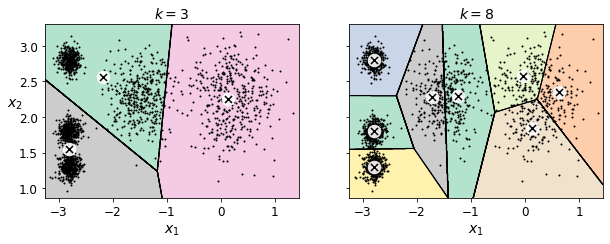

In [50]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [51]:
kmeans_k3.inertia_

653.2167190021553

In [52]:
kmeans_k8.inertia_

119.11983416102879

In [53]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [54]:
kmeans_per_k[2]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [55]:
inertias

[3534.8360871670784,
 1149.6140723750277,
 653.2167190021553,
 261.79677785694696,
 211.5985372581684,
 169.23715382893542,
 141.38336489568496,
 119.11983416102879,
 102.59271440440929]

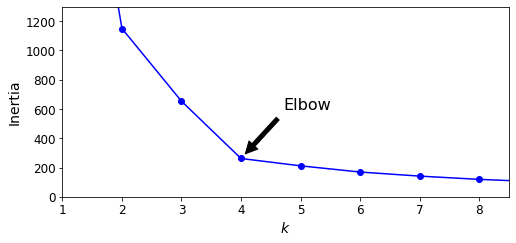

In [56]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
            xy=(4, inertias[3]),
            xytext=(0.55, 0.55),
            textcoords='figure fraction',
            fontsize=16,
            arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([1, 8.5, 0, 1300])
plt.show()

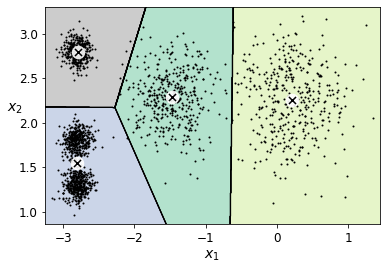

In [57]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [58]:
from sklearn.metrics import silhouette_score

In [59]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [60]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [61]:
silhouette_scores

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.6021101618281359,
 0.6068660656395705,
 0.5600381725018386,
 0.5668813637320855]

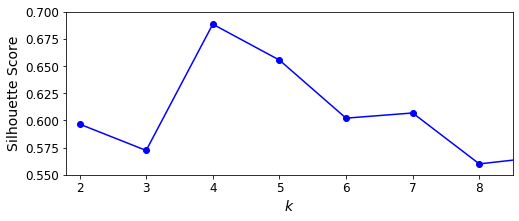

In [62]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

## Silhouette Diagram

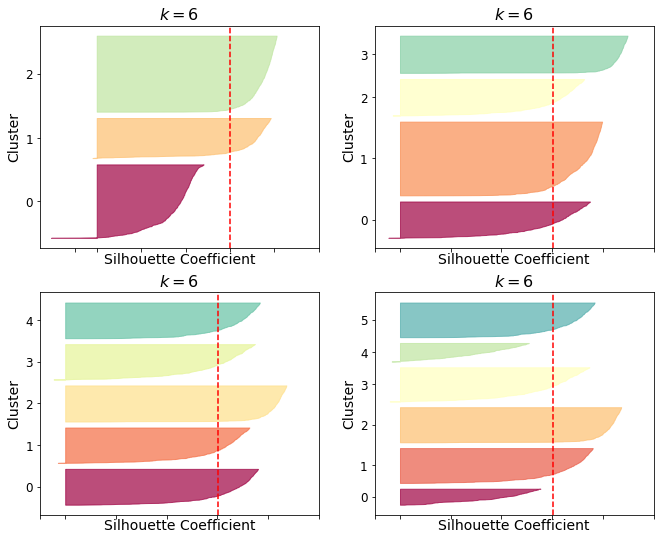

In [63]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, 
                         facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    for k in (3, 5):
        plt.ylabel("Cluster")
    
    for k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
    
plt.show()

## Using Clustering for Image Segmentation

In [64]:
# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
#urllib.request.urlretrieve(url, os.path.join(images_path, filename));

In [65]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [66]:
len(image.reshape(-1, 3))

426400

In [67]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [69]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

In [70]:
len(segmented_imgs)

5

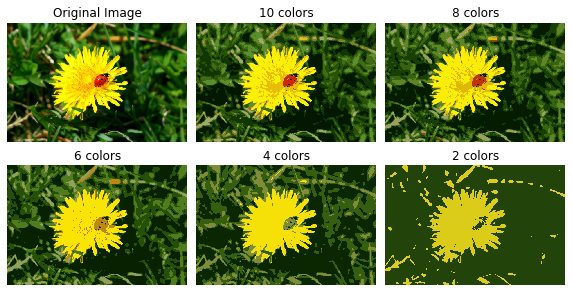

In [71]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
    
plt.show()
    


## Using Clusters for Preprocessing

In [72]:
from sklearn.datasets import load_digits

In [73]:
X_digits, y_digits = load_digits(return_X_y=True)

In [74]:
len(X_digits)

1797

Split the data into the train and test set.

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [77]:
len(X_train)/len(X_digits)

0.7495826377295493

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
LR = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
LR.score(X_test, y_test)

0.9688888888888889

In [81]:
from sklearn.pipeline import Pipeline

In [82]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("LR", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])
pipeline.fit(X_train,  y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [83]:
pipeline.score(X_test, y_test)

0.9777777777777777

In [84]:
1 - (1 - pipeline.score(X_test, y_test)) / (1 - LR.score(X_test, y_test))

0.28571428571428414

In [85]:
(pipeline.score(X_test, y_test) - LR.score(X_test, y_test)) / LR.score(X_test, y_test) * 100

0.917431192660545

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train,y_train)

In [ ]:
grid_clf.best_params_

In [133]:
grid_clf.score(X_test, y_test)

0.98

## Clustering for Semi-supervised Learning

In [86]:
n_labeled = 50

In [87]:
LR = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
LR.fit(X_train[:n_labeled], y_train[:n_labeled])
LR.score(X_test, y_test)

0.8333333333333334

In [88]:
k = 50

In [89]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

In [90]:
X_digits_dist.shape

(1347, 50)

In [91]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
representative_digit_idx

array([ 911,  559,   23,  159,  736, 1056,  776,  795,  753,  598,  737,
        683, 1194,  602,  817, 1284,   73,  702,   94,  891,  805, 1071,
       1314, 1022, 1050,  525,  588,  481, 1005,  766,  848,  731,  749,
       1322, 1336,  705, 1151,  494,  357,  459,  843,  850,  151,  256,
        576,  460,  596,  648,  841,  214])

In [92]:
X_train.shape

(1347, 64)

In [93]:
len(representative_digit_idx)

50

In [94]:
X_representative_digits = X_train[representative_digit_idx]
X_representative_digits.shape

(50, 64)

In [95]:
X_train[1]

array([ 0.,  5., 16., 15.,  3.,  0.,  0.,  0.,  0., 11., 14., 11., 11.,
        0.,  0.,  0.,  0.,  8., 11.,  4., 16.,  0.,  0.,  0.,  0.,  0.,
        0.,  4., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,
        0.,  0.,  0.,  0., 13.,  9.,  5.,  1.,  0.,  0.,  1., 11., 16.,
       16., 16., 10.,  0.,  0.,  5., 16., 14.,  8.,  6.,  1.,  0.])

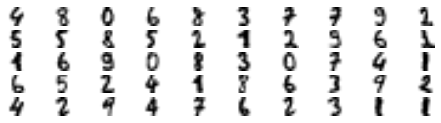

In [96]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8,8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
    
plt.show()

In [97]:
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1
])

The dataset is of 50 images, chosen as centers of there numerous clusters.

In [98]:
LR = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
LR.fit(X_representative_digits, y_representative_digits)
LR.score(X_test, y_test)

0.9222222222222223

In [99]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
y_train_propagated

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [100]:
y_train_propagated[kmeans.labels_==1] = y_representative_digits[1]

In [101]:
y_train_propagated

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [102]:
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [103]:
y_train_propagated

array([5, 2, 0, ..., 2, 7, 1], dtype=int32)

In [104]:
kmeans.labels_

array([10, 14, 26, ..., 41, 44, 48], dtype=int32)

In [105]:
LR = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
LR.fit(X_train, y_train_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
LR.score(X_test, y_test)

0.9333333333333333

In [107]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] =  -1

In [108]:
partially_propagated = (X_cluster_dist != -1)

In [109]:
type(partially_propagated)

numpy.ndarray

In [110]:
(X_cluster_dist != -1)

array([False, False, False, ..., False, False, False])

In [111]:
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [112]:
len(partially_propagated)

1347

In [113]:
len(X_train_partially_propagated)

291

In [114]:
len(y_train_partially_propagated)

291

In [115]:
LR = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
LR.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
LR.score(X_test, y_test)

0.94

A few things that I learnt,
1. Representation Learning,
2. Active Learning, and the use of 
3. Percentiles to improve scores.

## DBSCAN

In [117]:
from sklearn.datasets import make_moons

In [118]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [119]:
from sklearn.cluster import DBSCAN

In [120]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [121]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [122]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [123]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [124]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [125]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)
    
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
               c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker="*", s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
               c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

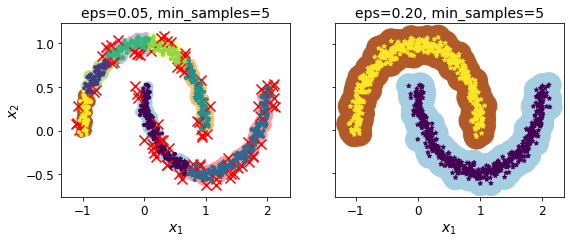

In [126]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [127]:
type(dbscan)

sklearn.cluster.dbscan_.DBSCAN

In [128]:
len(dbscan.core_sample_indices_), len(dbscan.components_)

(808, 808)

In [129]:
dbscan = dbscan2

In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
KNN = KNeighborsClassifier(n_neighbors=50)
KNN.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [132]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
KNN.predict(X_new)

array([1, 0, 1, 0])

In [133]:
KNN.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

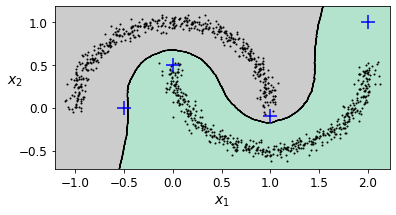

In [134]:
plt.figure(figsize=(6,3))
plot_decision_boundaries(KNN, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [135]:
y_dist, y_pred_idx = KNN.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist>0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

## Other Clustering Algorithms

### Spectral Clustering

In [140]:
from sklearn.cluster import SpectralClustering

In [141]:
SCL = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
SCL.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=100,
                   kernel_params=None, n_clusters=2, n_init=10, n_jobs=None,
                   n_neighbors=10, random_state=42)

In [142]:
SCL2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
SCL2.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1,
                   kernel_params=None, n_clusters=2, n_init=10, n_jobs=None,
                   n_neighbors=10, random_state=42)

In [143]:
# Come back to this later

## Guassian Mixture Models

In [136]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

In [137]:
type(make_blobs)

function

In [138]:
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [139]:
X.shape
# np.c_ [Concatenate along axis 1]
# np.r_ [Concatenate along axis 0]

(1250, 2)

In [140]:
from sklearn.mixture import GaussianMixture

In [141]:
GM = GaussianMixture(n_components=3, n_init=10, random_state=42)
GM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [142]:
GM.weights_

array([0.20965228, 0.4000662 , 0.39028152])

In [143]:
type(GM.weights_init)

NoneType

In [144]:
GM.means_ # Two dimensions and three clusters

array([[ 3.39909717,  1.05933727],
       [-1.40763984,  1.42710194],
       [ 0.05135313,  0.07524095]])

In [145]:
GM.covariances_

array([[[ 1.14807234, -0.03270354],
        [-0.03270354,  0.95496237]],

       [[ 0.63478101,  0.72969804],
        [ 0.72969804,  1.1609872 ]],

       [[ 0.68809572,  0.79608475],
        [ 0.79608475,  1.21234145]]])

In [146]:
GM.converged_

True

In [147]:
GM.n_iter_

4

In [148]:
np.unique(GM.predict(X))

array([0, 1, 2])

In [149]:
GM.predict_proba(X)

array([[2.32389467e-02, 6.77397850e-07, 9.76760376e-01],
       [1.64685609e-02, 6.75361303e-04, 9.82856078e-01],
       [2.01535333e-06, 9.99923053e-01, 7.49319577e-05],
       ...,
       [9.99999571e-01, 2.13946075e-26, 4.28788333e-07],
       [1.00000000e+00, 1.46454409e-41, 5.12459171e-16],
       [1.00000000e+00, 8.02006365e-41, 2.27626238e-15]])

In [150]:
X_new, y_new = GM.sample(6)

In [151]:
y_new

array([0, 1, 2, 2, 2, 2])

In [152]:
len(X), len(GM.score_samples(X))

(1250, 1250)

In [153]:
GM.score_samples(X)

array([-2.60782346, -3.57106041, -3.33003479, ..., -3.51352783,
       -4.39802535, -3.80743859])

In [154]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

In [155]:
pdf = np.exp(GM.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999217849

In [156]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_labels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[0], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, 
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z, 
               norm=LogNorm(vmin=1.0, vmax=30.0),
               levels=np.logspace(0, 2, 12),
               linewidths=1, colors='k')
    """plt.contour(xx, yy, Z, 
               linewidths=2, colors='r', linestyles='dashed')
    """
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)
    
    plt.xlabel("$x_1$", fontsize=14)
    if show_labels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

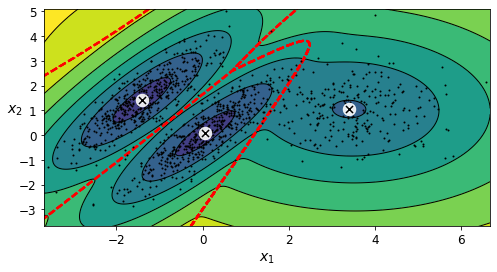

In [157]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(GM, X)
plt.show()

In [158]:
GM_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
GM_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
GM_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
GM_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)

In [159]:
GM_full.fit(X)
GM_tied.fit(X)
GM_spherical.fit(X)
GM_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [160]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))
    
    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)
    
    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_labels=False)
    plt.title(f"covariance_type=\"{gm2.covariance_type}\"", fontsize=14)

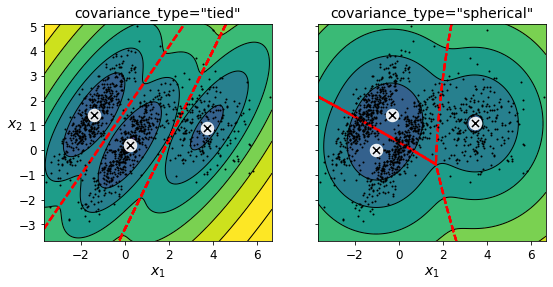

In [161]:
compare_gaussian_mixtures(GM_tied, GM_spherical, X)
plt.show()

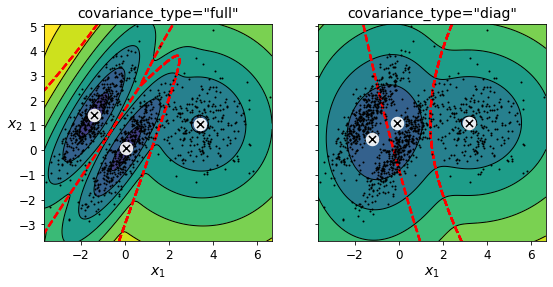

In [162]:
compare_gaussian_mixtures(GM_full, GM_diag, X)
plt.show()

In [163]:
densities = GM.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [164]:
densities

array([-2.60782346, -3.57106041, -3.33003479, ..., -3.51352783,
       -4.39802535, -3.80743859])

In [165]:
densities < density_threshold

array([False, False, False, ..., False, False, False])

In [166]:
sum(densities < density_threshold)

50

In [167]:
50 / len(densities)

0.04

In [168]:
anomalies

array([[-0.11118987,  1.61334992],
       [ 0.62362922,  4.41540435],
       [ 1.49808977, -0.15251688],
       [ 0.74219223, -1.00445177],
       [-2.53940854, -2.76549965],
       [-1.62447969, -0.45770022],
       [-1.74680316, -0.78385111],
       [-3.58308316, -1.28249917],
       [ 0.53903026,  5.00244257],
       [-0.51480414, -2.16270124],
       [-1.81015204, -0.58926015],
       [-1.79651788, -0.97031471],
       [-2.11225785, -2.09712817],
       [-3.39408574, -2.28378778],
       [ 1.58082729,  4.20122873],
       [-2.48037945, -1.18651064],
       [-2.93972237, -1.41660564],
       [-1.62285961, -2.84860478],
       [-0.25954463, -1.7743691 ],
       [ 0.46018217,  2.78323717],
       [-2.06317379,  2.2670332 ],
       [ 0.13982849,  2.08023553],
       [-2.54004484, -2.8290338 ],
       [-1.93037427, -1.19447352],
       [-0.27124433, -1.86750177],
       [-1.15568262, -2.57480367],
       [-1.93315582,  2.49030105],
       [ 4.93207567, -0.42157602],
       [ 5.80546094,

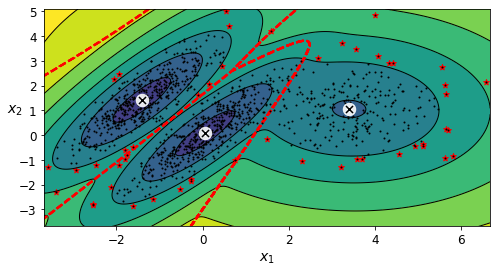

In [169]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(GM, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

Model Selection Using Bayesian Information Criterion or the Akaike Information Criterion

$BIC = \log\left(m\right)p - 2\log(\hat L)$

$AIC = 2p - 2\log(\hat L)$

In [170]:
GM.bic(X) # Bayesian Information Criterion

8189.74345832983

In [171]:
GM.aic(X) # Aaike Information Criterion

8102.518178214792

In [172]:
X.shape

(1250, 2)

In [173]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = GM.score(X) * len(X)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [174]:
bic, aic

(8189.74345832983, 8102.518178214792)

In [183]:
n_params

17

The $n X n$ covariance matrix has these $X$ degrees of freedom;

$ 1 + 2 + \dots + n = \dfrac{n (n + 1)}{2}$

In [184]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in range(1, 11)]

In [185]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

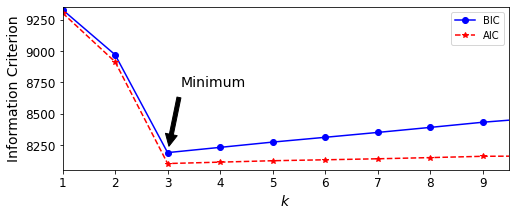

In [186]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "r*--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
            xy=(3, bics[2]),
            xytext=(0.35, 0.6),
            textcoords='figure fraction',
            fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.1))
plt.legend()
plt.show()

In [189]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                             covariance_type=covariance_type,
                             random_state=42).fit(X).bic(X)
        
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [190]:
best_k

3

In [191]:
best_covariance_type

'full'

# Variational Bayesian Gaussian Mixtures

In [187]:
# The smart machines.

In [175]:
from sklearn.mixture import BayesianGaussianMixture
BGM = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
BGM.fit(X)
np.round(BGM.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [176]:
BGM.weights_

array([3.95095317e-01, 2.05162685e-01, 3.99662331e-01, 7.24246329e-05,
       6.58404122e-06, 5.98549202e-07, 5.44135638e-08, 4.94668762e-09,
       4.49698874e-10, 4.08817159e-11])

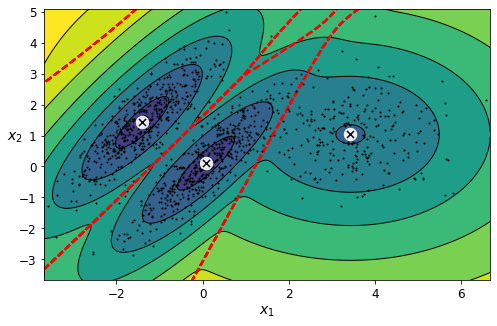

In [177]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(BGM, X)
plt.show()

In [178]:
BGM_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                 weight_concentration_prior=0.01, random_state=42)
BGM_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
BGM_low.fit(X[:nn])
BGM_high.fit(X[:nn])

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=1000, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=1,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=10000,
                        weight_concentration_prior_type='dirichlet_process')

In [180]:
# Check the number of clusters with a low weight concentration
np.round(BGM_low.weights_, 2)

array([0.52, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [181]:
# with a high weught concentration
np.round(BGM_high.weights_, 2)

array([0.01, 0.18, 0.27, 0.11, 0.01, 0.01, 0.01, 0.01, 0.37, 0.01])

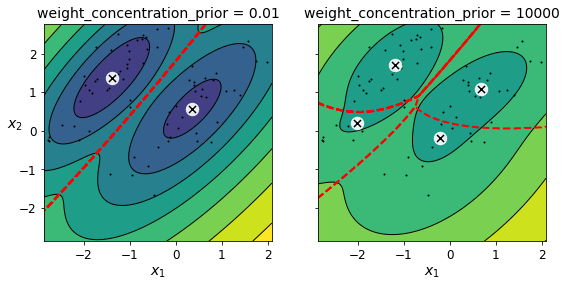

In [183]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(BGM_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(BGM_high, X[:nn], show_labels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

plt.show()

In [184]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [185]:
BGM = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
BGM.fit(X_moons)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

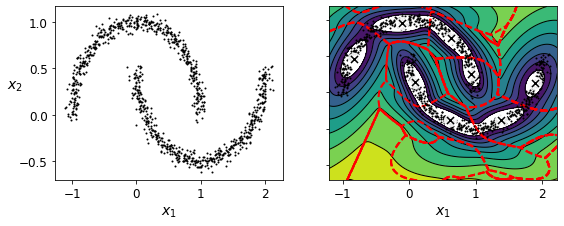

In [186]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(BGM, X_moons, show_labels=False)

plt.show()

Gaussian Mixtures work well with ellipsoidal datasets but terribly if not the case.

The Likelihood Function defines the model parameters $\theta$ given a random variable $X$, while probability defines the plausiblity of random variable $X$ given the model parameters $\theta$.

An integration over a probability distribution function results into one while an integration over a likelihood function results into a positive result.

In [187]:
from scipy.stats import norm

In [188]:
xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)

In [199]:
XX, SS = np.meshgrid(xx, ss)
ZZ = 2 * norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS)
ZZ = ZZ / ZZ.sum(axis=1)[:, np.newaxis] / (xx[1] - xx[0])

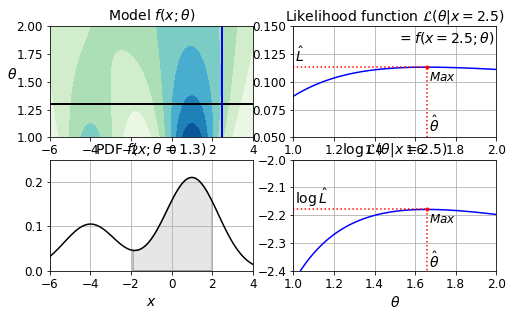

In [202]:
from matplotlib.patches import Polygon

plt.figure(figsize=(8, 4.5))

x_idx = 85
s_idx = 30

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\theta$", fontsize=14, rotation=0)
plt.title(r"Model $f(x; \theta)$", fontsize=14)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, 0.055, r"$\hat{\theta}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.012, r"$Max$", fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$\theta$", fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=14, ha="right")
plt.title(r"Likelihood function $\mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=14)
plt.grid(True)
plt.title(r"PDF $f(x; \theta=1.3)$", fontsize=14)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$\theta$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx]+ 0.01, -2.39, r"$\hat{\theta}$", fontsize=14)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=14)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.show()

In [ ]:
Wow! 